In [ ]:
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
tf.config.experimental.list_physical_devices()

In [ ]:
tf.config.experimental.list_logical_devices()

In [4]:
three_dim_array = np.random.rand(3, 4, 5)

In [11]:
three_dim_array.shape

(3, 4, 5)

In [12]:
new=three_dim_array.reshape(three_dim_array.shape[0],4*5)

In [13]:
new

array([[0.87637567, 0.93622742, 0.7588406 , 0.52060901, 0.36636502,
        0.51495771, 0.91098126, 0.93759292, 0.27813171, 0.95614485,
        0.5720763 , 0.50486563, 0.42948035, 0.66858807, 0.41800539,
        0.32244566, 0.02550368, 0.75910274, 0.65124892, 0.59328117],
       [0.17787996, 0.54267463, 0.27904881, 0.52230026, 0.97186302,
        0.76440652, 0.13429582, 0.60714672, 0.19895014, 0.75579223,
        0.2461546 , 0.5923851 , 0.18233702, 0.89661285, 0.91034221,
        0.0335421 , 0.0583758 , 0.61526149, 0.37188826, 0.37098265],
       [0.0372399 , 0.59336674, 0.56338455, 0.86808597, 0.86541666,
        0.08355191, 0.37539635, 0.70754479, 0.64602154, 0.18059617,
        0.44911344, 0.48013929, 0.63818996, 0.54755981, 0.99574409,
        0.62192841, 0.84040199, 0.81874136, 0.4596504 , 0.56464841]])

In [51]:
(x_train,y_train),(x_test,y_test)=tf.keras.datasets.cifar10.load_data()

In [52]:
def plot_figure(x):
    plt.figure(figsize=(10,1))
    plt.imshow(x_train[x])

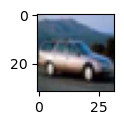

In [53]:
plot_figure(4)


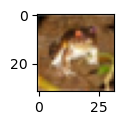

In [54]:
plot_figure(0)

In [55]:
x_train[0]

array([[[ 59,  62,  63],
        [ 43,  46,  45],
        [ 50,  48,  43],
        ...,
        [158, 132, 108],
        [152, 125, 102],
        [148, 124, 103]],

       [[ 16,  20,  20],
        [  0,   0,   0],
        [ 18,   8,   0],
        ...,
        [123,  88,  55],
        [119,  83,  50],
        [122,  87,  57]],

       [[ 25,  24,  21],
        [ 16,   7,   0],
        [ 49,  27,   8],
        ...,
        [118,  84,  50],
        [120,  84,  50],
        [109,  73,  42]],

       ...,

       [[208, 170,  96],
        [201, 153,  34],
        [198, 161,  26],
        ...,
        [160, 133,  70],
        [ 56,  31,   7],
        [ 53,  34,  20]],

       [[180, 139,  96],
        [173, 123,  42],
        [186, 144,  30],
        ...,
        [184, 148,  94],
        [ 97,  62,  34],
        [ 83,  53,  34]],

       [[177, 144, 116],
        [168, 129,  94],
        [179, 142,  87],
        ...,
        [216, 184, 140],
        [151, 118,  84],
        [123,  92,  72]]

In [56]:
x_train.shape

(50000, 32, 32, 3)

In [75]:
y_train.shape

(50000, 1)

In [71]:
y_train_flattern=y_train.reshape(len(y_train))

In [74]:
y_train_flattern.shape

(50000,)

In [58]:
# from sklearn.preprocessing import MinMaxScaler
# sx=MinMaxScaler()
# x_train_scaled=sx.fit_transform(x_train)
# x_test_scaled=sx.transform(x_test)
# can't do untile we flatter it

In [59]:
x_train_flattern=x_train.reshape(len(x_train),32*32*3)
x_test_flattern=x_test.reshape(len(x_test),32*32*3)

In [60]:
x_train_flattern.shape

(50000, 3072)

In [61]:
x_train_flattern[0]

array([ 59,  62,  63, ..., 123,  92,  72], dtype=uint8)

In [62]:
from sklearn.preprocessing import MinMaxScaler
sx=MinMaxScaler()
x_train_scaled=sx.fit_transform(x_train_flattern)
x_test_scaled=sx.transform(x_test_flattern)

In [63]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [64]:
len(classes)

10

In [65]:
y_train.shape

(50000, 1)

In [66]:
classes[y_train[0][0]]

'frog'

In [92]:
model_1=keras.Sequential([
    keras.layers.Dense(3000, input_shape=(32*32*3,), activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model_1.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
mode_1.fit(x_train_scaled,y_train,epochs=5)

Epoch 1/5
1563/1563 [==============================] - 139s 88ms/step - loss: 1.8883 - accuracy: 0.3257
Epoch 2/5
1563/1563 [==============================] - 135s 86ms/step - loss: 1.6603 - accuracy: 0.4007
Epoch 3/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.5734 - accuracy: 0.4348
Epoch 4/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.5221 - accuracy: 0.4527
Epoch 5/5
1563/1563 [==============================] - 133s 85ms/step - loss: 1.4805 - accuracy: 0.4675


In [ ]:
classes[y_test[0][0]]
classes[np.argmax(model_1.predict(x_test_scaled)[0])]

In [ ]:
classes[y_test[0][0]]
classes[np.argmax(model_1.predict(x_test_scaled)[0])]

In [ ]:
model_2=keras.Sequential([
    keras.layers.Dense(3000, input_shape=(32*32*3,), activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model_2.compile(
    optimizer='adam',
    loss='sparse_categorical_crossentropy',
    metrics=['accuracy']
)
model_2.fit(x_train_scaled,y_train_flattern,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 139s 88ms/step - loss: 1.8899 - accuracy: 0.3260
Epoch 2/3
1563/1563 [==============================] - 137s 88ms/step - loss: 1.6518 - accuracy: 0.4081
Epoch 3/3
1096/1563 [====================>.........] - ETA: 41s - loss: 1.5690 - accuracy: 0.4373

In [ ]:
classes[y_test[0][0]]

In [ ]:

classes[np.argmax(model_2.predict(x_test_scaled)[0])]

In [69]:
y_train.shape

(50000, 1)

In [95]:
y_train_categorical = keras.utils.to_categorical(
    y_train, num_classes=10, dtype='float32'
)
y_test_categorical = keras.utils.to_categorical(
    y_test, num_classes=10, dtype='float32'
)

In [96]:
y_train.shape

(50000, 1)

In [97]:
y_train_categorical.shape

(50000, 10)

In [98]:
y_train_categorical[0]

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [99]:
y_train[0:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [115]:
model_3=keras.Sequential([
    keras.layers.Dense(3000, input_shape=(32*32*3,), activation='relu'),
    keras.layers.Dense(1000,activation='relu'),
    keras.layers.Dense(10,activation='sigmoid')
])
model_3.compile(
    optimizer='SGD',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)
model_3.fit(x_train_scaled,y_train_categorical,epochs=3)

Epoch 1/3
1563/1563 [==============================] - 50s 31ms/step - loss: 1.8127 - accuracy: 0.3541
Epoch 2/3
1563/1563 [==============================] - 49s 31ms/step - loss: 1.6229 - accuracy: 0.4265
Epoch 3/3
1563/1563 [==============================] - 48s 31ms/step - loss: 1.5395 - accuracy: 0.4579


In [117]:
classes[y_test[0][0]]

'cat'

In [116]:

classes[np.argmax(model_3.predict(x_test_scaled)[0])]

313/313 [==============================] - 3s 9ms/step


'dog'

In [106]:
x_train_scaled_2 = x_train / 255
x_test_scaled_2 = x_test / 255

In [112]:
model_4= keras.Sequential([
        keras.layers.Flatten(input_shape=(32,32,3)),
        keras.layers.Dense(3000, activation='relu'),
        keras.layers.Dense(1000, activation='relu'),
        keras.layers.Dense(10, activation='sigmoid')    
    ])

model_4.compile(optimizer='SGD',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model_4.fit(x_train_scaled_2, y_train_categorical, epochs=1)

1563/1563 [==============================] - 55s 34ms/step - loss: 1.8105 - accuracy: 0.3540


In [110]:
classes[y_test[0][0]]

'cat'

In [114]:
classes[np.argmax(model_4.predict(x_test_scaled_2)[0])]

313/313 [==============================] - 3s 9ms/step


'cat'